These first blocks can be used to import the dataset directly from uci

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


Importing datasets manually

In [3]:
df_red = pd.read_csv('../winequality-red.csv', sep=';')

df_white = pd.read_csv('../winequality-white.csv', sep=';')

STO OMETTENDO L'EDA DEI SINGOLI DATASET PERCHÈ L'HA GIÀ FATTA MICHAEL

In [5]:
df_red['color'] = 0    # per red
df_white['color'] = 1  # per white

In [6]:
df = pd.concat([df_red, df_white], ignore_index=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


## Expolaratory Data analysis

In [7]:
# useful only with direct import from website

# df = pd.concat([X, y], axis=1)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [9]:
df.shape

(6497, 13)

In [10]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


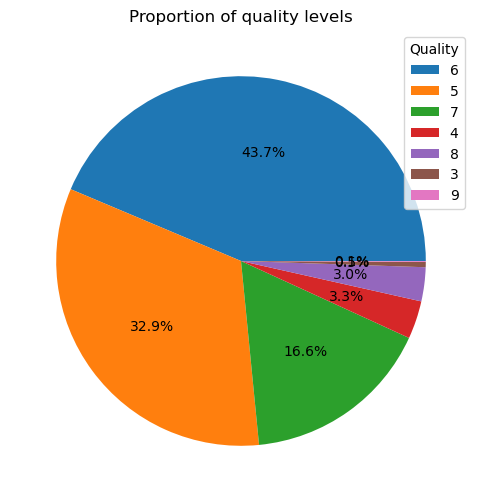

In [11]:
y = df['quality']
count = y.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of quality levels')
plt.legend(labels=count.index, title="Quality", loc="best")
plt.show()

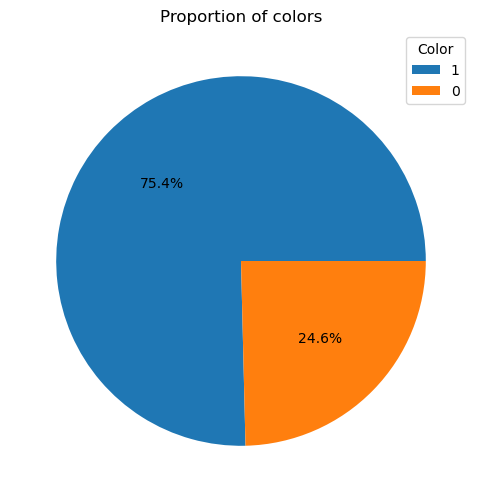

In [12]:
y = df['color']
count = y.value_counts()
plt.figure(figsize=(10, 6))
plt.pie(count, labels=None, autopct='%1.1f%%')
plt.title('Proportion of colors')
plt.legend(labels=count.index, title="Color", loc="best")
plt.show()

Red wines are 1/4 of total, furthermore the classes are unbalanced. First we are going to try some models and methodes with the original data; then we are going to use augmentic techniques and we will compare the results.

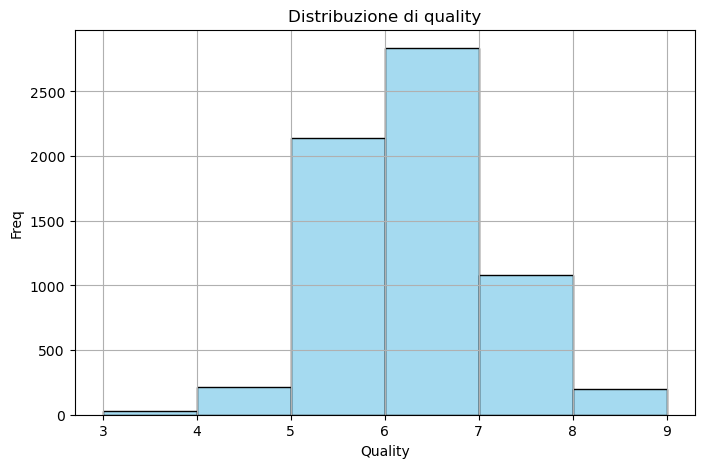

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=range(df['quality'].min(), df['quality'].max()+1), color='skyblue')
plt.title("Distribuzione di quality")
plt.xlabel("Quality")
plt.ylabel("Freq")
plt.grid(True)
plt.show()


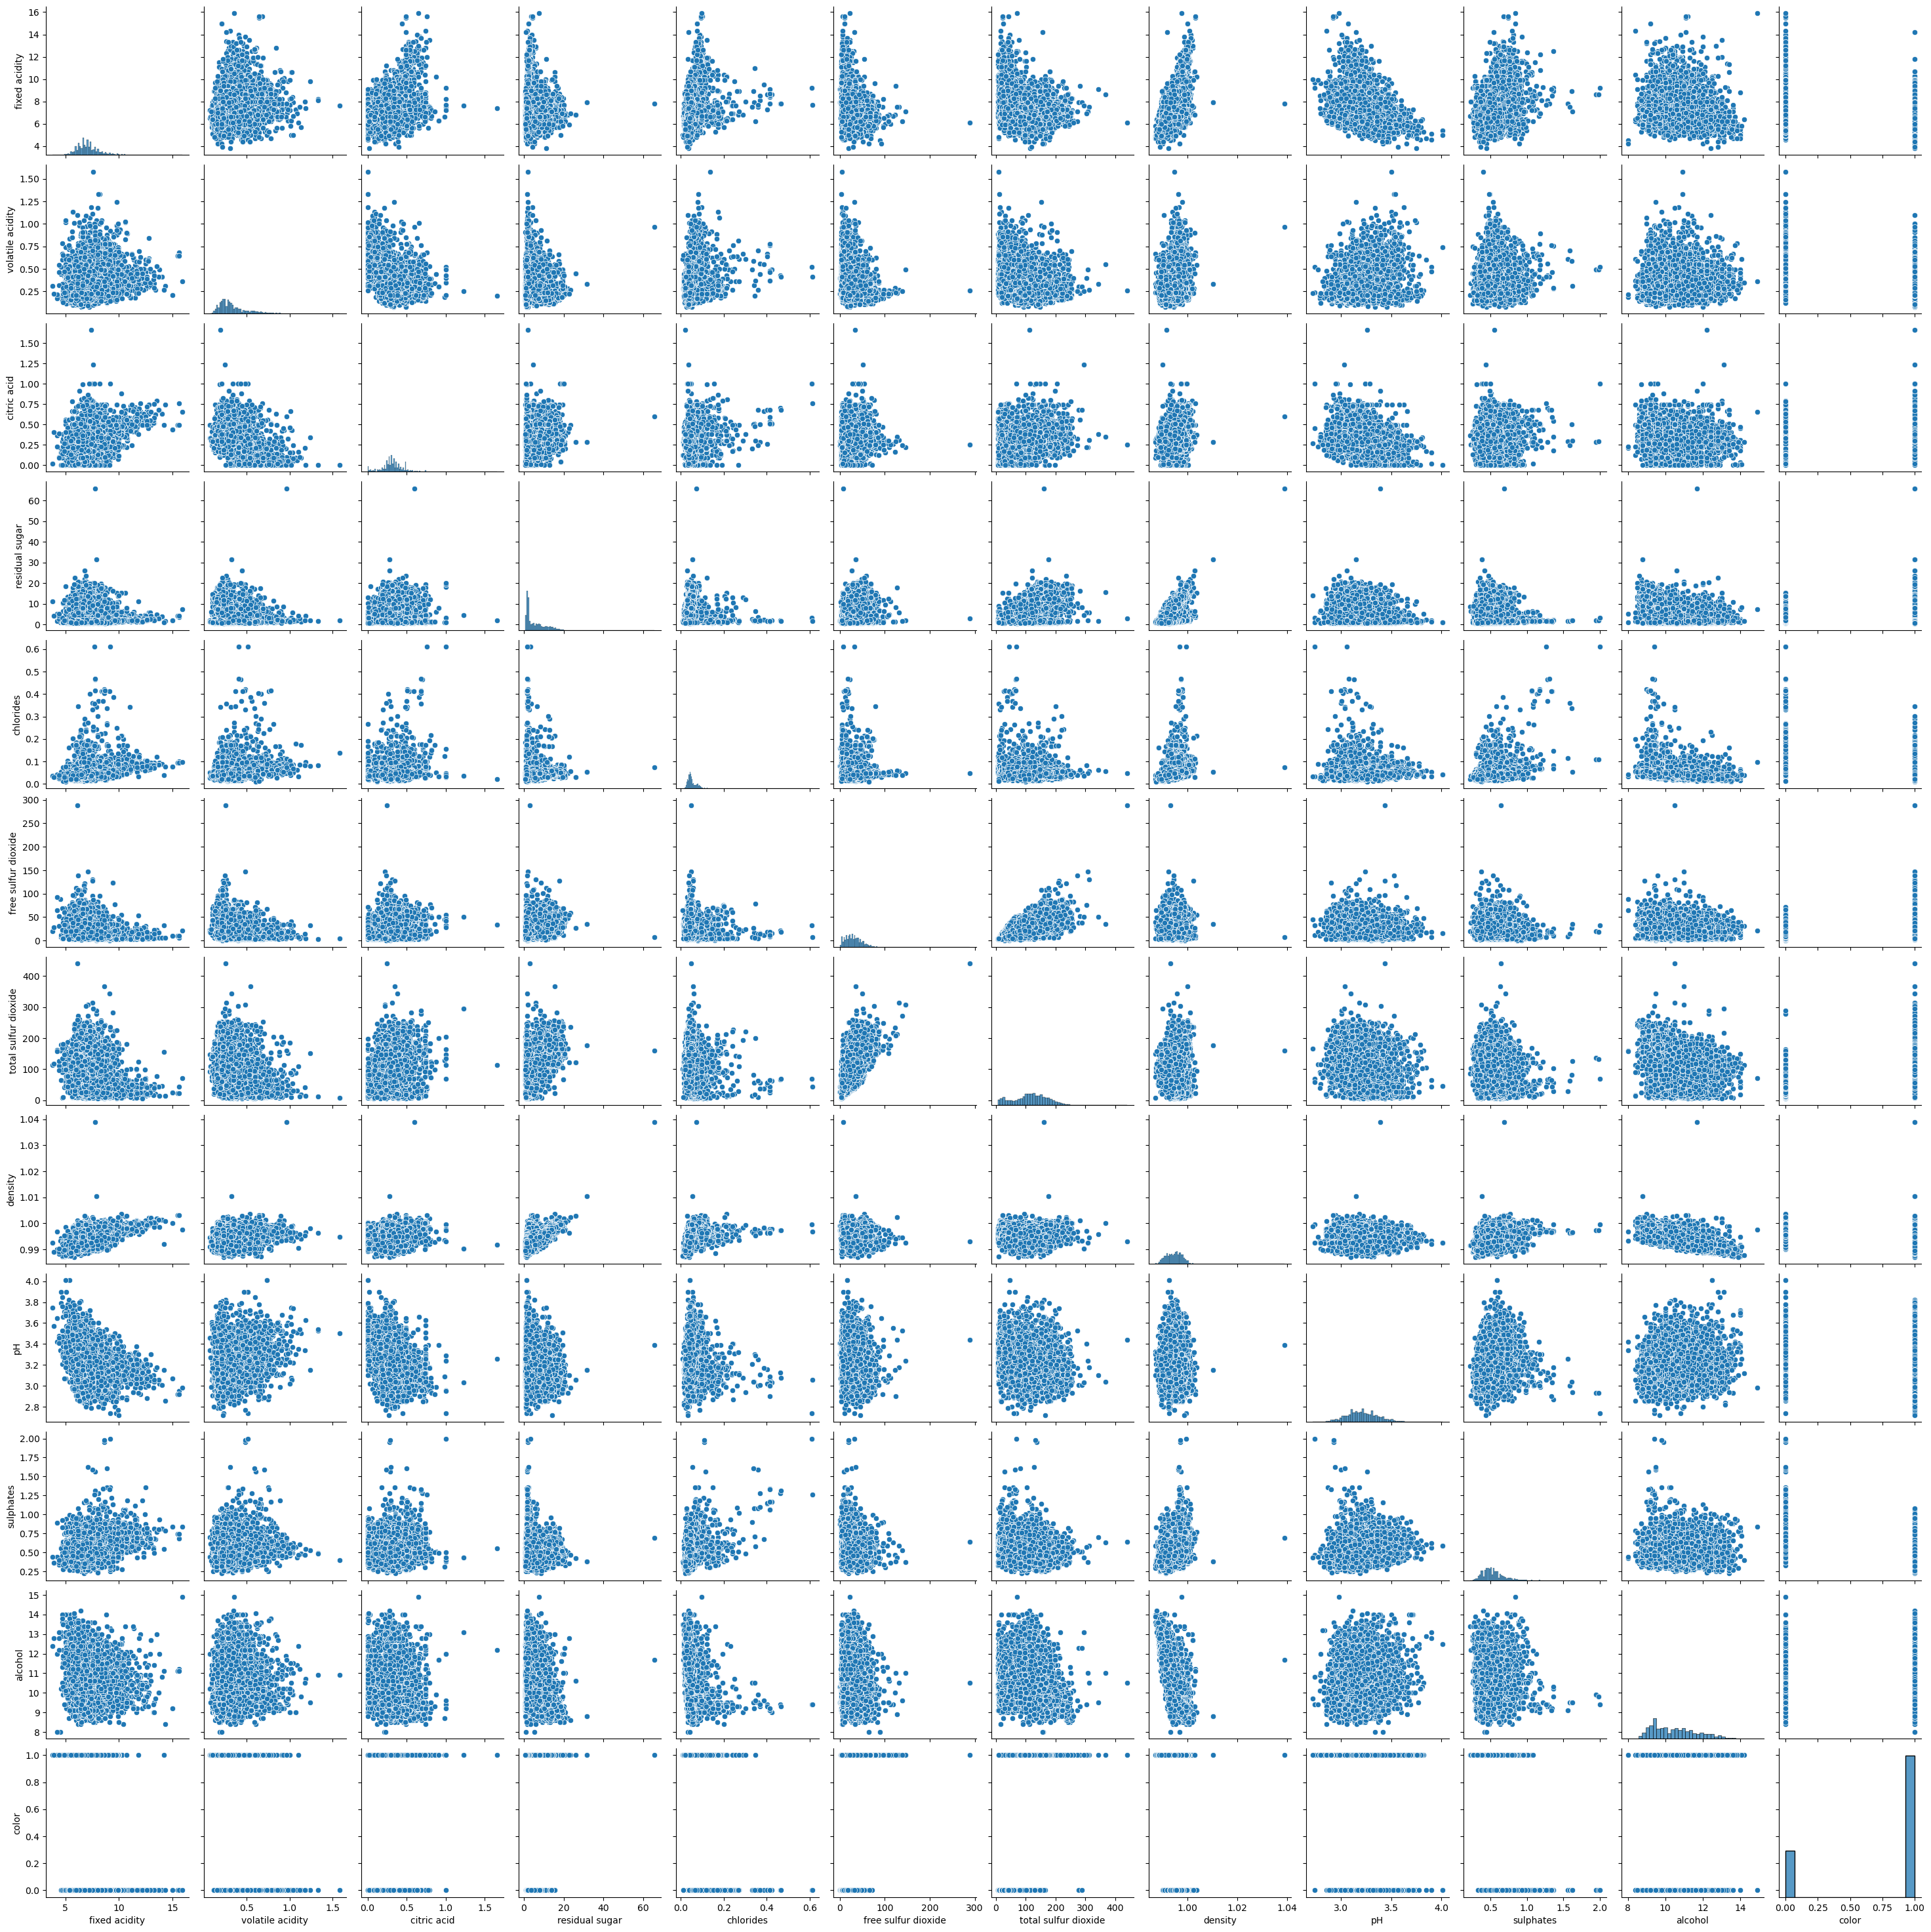

In [14]:
sns.pairplot(df.drop(columns= 'quality'))

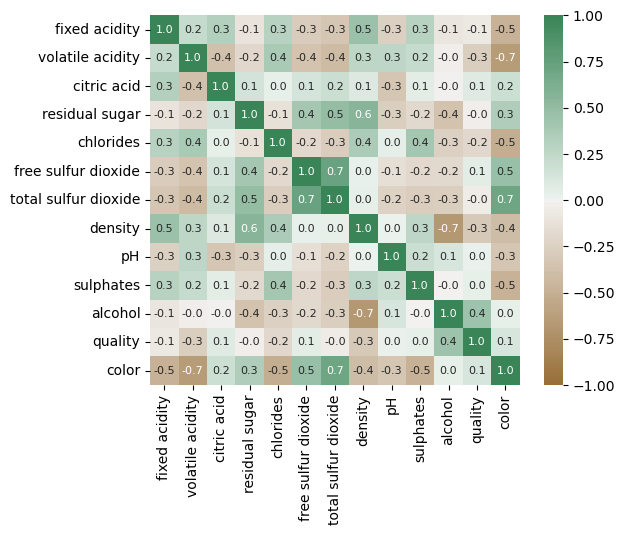

In [15]:
correlation = df.corr()

axis_corr = sns.heatmap(
correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True,
annot=True,
fmt=".1f",
annot_kws={"size": 8}
)

plt.show()

total sulfur dioxide - free sulfur dioxide
and
total sulfur dioxide - color
have a correlation score >= 0.7

Magari faccio un'unica colonna per il diossido di solfato. Del colore amen

volatile acidity - color
and 
alcohol - density
have a correlation score <= -0.7

non penso mi dia troppo fastidio la correlazione alcohol - density, al massimo poi faccio un comparison

In [16]:
df['bound_sulfur_dioxide'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

Prima di fare PCA scalo i valori continui

In [17]:
X = df.drop(columns='quality')
exclude = ['color']

to_scale = [col for col in X.columns if col not in exclude]

scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[to_scale] = scaler.fit_transform(X[to_scale])


In [18]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

y = df['quality'].values

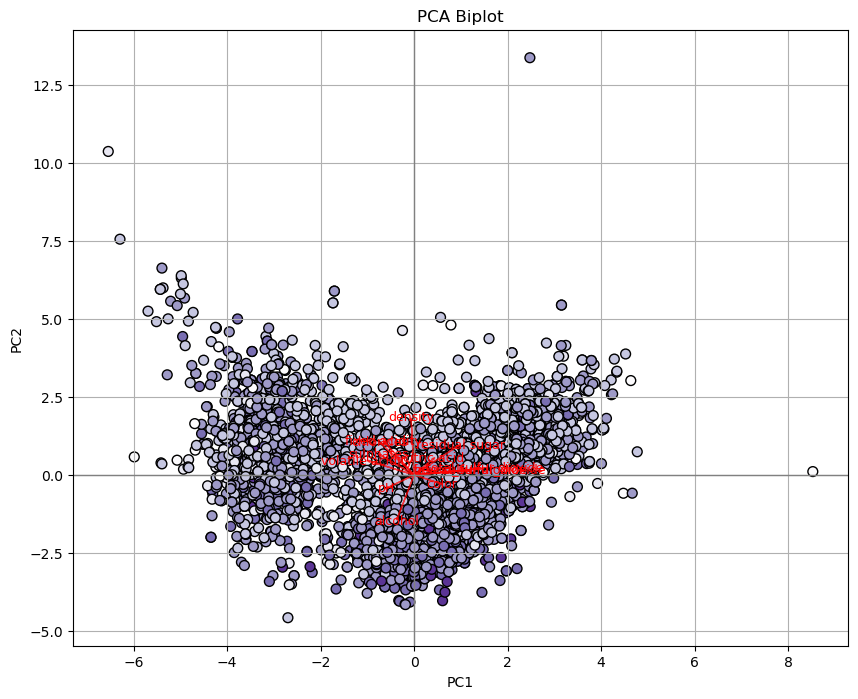

In [19]:
# so che non si vede, ma questa è comunque la cmap con cui si vede di piu
loadings = pca.components_.T 
feature_names = X_scaled.columns

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Purples', edgecolor='k', s=50)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot")


for i, feature in enumerate(feature_names):
    plt.arrow(0, 0,
              loadings[i, 0] * 3,
              loadings[i, 1] * 3,
              color='r', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0] * 3.2, loadings[i, 1] * 3.2,
             feature, color='r', ha='center', va='center', fontsize=9)

plt.grid(True)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.show()


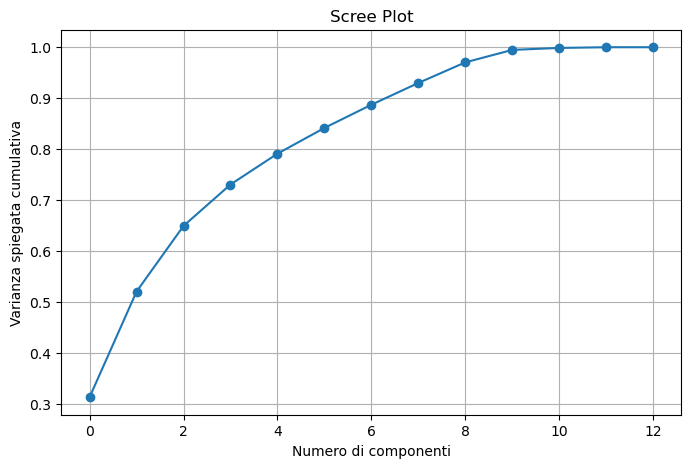

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Numero di componenti')
plt.ylabel('Varianza spiegata cumulativa')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [21]:
pve = pca_full.explained_variance_ratio_
for i, v in enumerate(pve):
    print(f"PC{i+1}: {v:.4f}")


PC1: 0.3140
PC2: 0.2071
PC3: 0.1287
PC4: 0.0812
PC5: 0.0604
PC6: 0.0504
PC7: 0.0455
PC8: 0.0427
PC9: 0.0404
PC10: 0.0244
PC11: 0.0038
PC12: 0.0014
PC13: 0.0000


Quindi potremmo fare un tentativo allenando sui tre pc

# First experiment
Firstly we try to train models on the original (scaled) data.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [23]:
X_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color,bound_sulfur_dioxide
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,-1.369884
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,0,-0.951560
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,0,-1.017611
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0,-0.929543
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,0,-1.369884
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,-0.783214,-0.787650,-0.197054,-0.807837,-0.486252,-0.367664,-0.420128,-1.186161,0.320319,-0.210144,0.593818,1,-0.379117
6493,-0.474652,-0.119460,0.284686,0.537425,-0.257883,1.491697,0.924588,0.067824,-0.426067,-0.478971,-0.747766,1,0.567616
6494,-0.551792,-0.605417,-0.885253,-0.891916,-0.429160,-0.029599,-0.083949,-0.719251,-1.421248,-0.478971,-0.915464,1,-0.092895
6495,-1.323198,-0.301694,-0.128234,-0.912936,-0.971538,-0.593041,-0.101642,-2.003251,0.755710,-1.016626,1.935402,1,0.105258


In [24]:
y = df['quality']

In [25]:
print({f"X shape: {X.shape}, y shape: {y.shape}"})

{'X shape: (6497, 13), y shape: (6497,)'}


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3, random_state = 42, shuffle= True)

## Logistic Regression

In [27]:
log_model = LogisticRegression()


In [28]:
log_model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions = log_model.predict(X_test)


In [30]:
confusion_matrix(y_test, predictions)

array([[  0,   0,   4,   3,   1,   1,   0],
       [  0,   2,  43,  24,   0,   0,   0],
       [  0,   3, 369, 236,   5,   0,   0],
       [  0,   0, 241, 601,  52,   0,   0],
       [  0,   0,  20, 223,  72,   0,   0],
       [  0,   0,   3,  32,  14,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0]])

In [31]:
accuracy_score(y_test, predictions)

0.5353846153846153

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [33]:
tree_model = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha=0.1)
tree_model.fit(X_train, y_train)
y_predicted_train = tree_model.predict(X_train)
y_predicted_test = tree_model.predict(X_test)
training_acc = accuracy_score(y_train, y_predicted_train)
testing_acc = accuracy_score(y_test, y_predicted_test)
print(f'training accuracy {training_acc}\n testing accuracy {testing_acc}')


training accuracy 0.47239938420936883
 testing accuracy 0.46307692307692305
